<a href="https://colab.research.google.com/github/davidho27941/ML_tutorial_notebook/blob/main/Numpy_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 利用NumPy建立簡單迴歸模型

在開始學習利用各種機器學習平台進行機器學習的建模以及訓練前，我們可以藉由最基本的範例來了解機器學習是怎麼樣去對一筆數據進行學習、並調整參數至最接近目標的狀態。

在這章節，我們將用`Numpy`函式庫來演示最基本的線性回歸是如何完成的。


## 範例簡介

在本範例中，我們將利用以下的函數

$y = a + bx + cx^{2} + dx^{3}$

來對目標函數

$y = sin(x)$

進行線性回歸。

首先，我會會先將`a`, `b`, `c`, `d`四個參數設定為隨機亂數。在訓練過程中，我們將不斷的計算每次的梯度值，並利用每次的梯度值來對各項參數進行更新，此做法被稱為**[梯度下降法](https://zh.wikipedia.org/wiki/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95)**。 

### 載入函式庫

首先，我們載入需要用到的函式庫

* Numpy 
* Math

In [1]:
import numpy as np
import math

### 初始化變數

接下來，我們要初始化所需要用到的變數，我們將會需要：

* `(x, y)` 作為目標函數
* `(a, b, c, d)` 作為學習用的隨機參數
* `learning rate` 作為學習機率參數，用來參與梯度下降法的計算

In [2]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

### 進行迭代

接下來，我們將進行3000次迭代來完成線性回歸。在每次的迭代中，我們將會計算每一次迭代時的損失值（loss）並利用預測值以及目標函數之間的差異計算梯度，並利用[反向傳播法](https://zh.wikipedia.org/wiki/%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95)更新權重。

In [3]:
for t in range(4000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3')

99 280.29574717917944
199 192.7226011957286
299 133.53143330410992
399 93.48301283111908
499 66.358260787325
599 47.96718538316751
699 35.484222391323826
799 27.002094541032008
899 21.23210617684886
999 17.302640766480657
1099 14.623566317297685
1199 12.794909722673388
1299 11.5452903258184
1399 10.690375959854482
1499 10.10482242002173
1599 9.703301218277652
1699 9.427658937802434
1799 9.238217422674008
1899 9.10787317572237
1999 9.01809095692625
2099 8.95618050963521
2199 8.913443400578405
2299 8.883910540143898
2399 8.863481129495504
2499 8.849334721806839
2599 8.83952930835098
2699 8.832726254774819
2799 8.828001835333703
2899 8.82471795362629
2999 8.822433361645462
3099 8.82084262162998
3199 8.819734094518877
3299 8.818960992137598
3399 8.818421409142715
3499 8.818044534400972
3599 8.817781119466833
3699 8.817596883037897
3799 8.817467942432005
3899 8.817377646011916
3999 8.817314374855975
Result: y = -0.00038 + 0.85687 x + 0.00007 x^2 + -0.09335 x^3


## 檢視成果

經由上一步中的迭代，我們取得了一組參數(a, b, c, d)。我們可以利用繪圖的方式來觀察這一筆參數所描繪的曲線與我們的目標函數（正弦函數）之間有多大的差距。

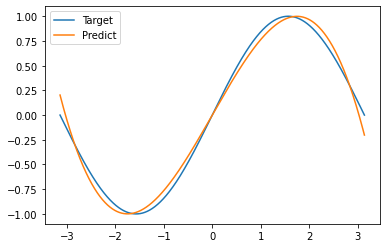

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y, label = 'Target')
plt.plot(x, a+b*x+c*x**2+d*x**3, label='Predict')
plt.legend(loc = 'upper left')
plt.show()

由上方的圖例可以發現，雖然仍有些差距，但我們的線性回歸表現出了相當不錯的成果。如果想要或許更加接近的表現，可以藉由調`整學習率（learning rate）`或是改變我們所設定的函數$y = a + bx + cx^{2} + dx^{3}$來改善線性回歸的表現。

99 1042.8745939855282
199 500.27292135346903
299 245.85610772755325
399 126.01874703213332
499 69.31750359673396
599 42.37101393862626
699 29.51041644069271
799 23.347359008582
899 20.382369144865258
999 18.95067764131747
1099 18.256970408807057
1199 17.919759789898663
1299 17.755352592898994
1399 17.674975581929687
1499 17.635581279500215
1599 17.61622917735096
1699 17.606702899462913
1799 17.602004702778217
1899 17.599683728987408
1999 17.59853540450198
2099 17.5979664930352
2199 17.597684299706245
2299 17.597544175580573
2399 17.597474530432912
2499 17.59743988600037
2599 17.59742263960255
2699 17.597414048519795
2799 17.59740976650405
2899 17.597407631151903
2999 17.59740656581969
3099 17.59740603411392
Result: y = 0.00002 + 0.85686 x + -0.00000 x^2 + -0.09336 x^3


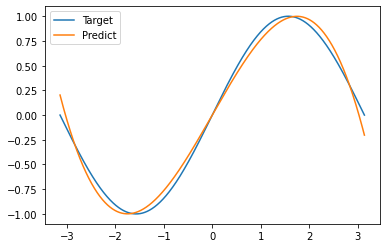

In [5]:
#@title 牛刀小試
#@markdown 接下來，請自行調整學習率以及模型來觀察對線性回歸的表現會有怎樣的影響。

#@markdown 設定學習率
lr = 0.000001 #@param [0.00001, 0.000001, 0.0000001, 0.00000001] {type:"raw"} 

#@markdown 設定顯示頻率（每幾次迭代顯示一次損失值）
MONITER_RATE = 100 #@param {type:"slider", min:100, max:10000, step:100} 

#@markdown 設定迭代次數
NUM_ITER = 3100 #@param {type:"slider", min:100, max:10000, step:400} 

#@markdown 設定用來進行線性回歸的函數

#@markdown 模式A : $y = a + bx$

#@markdown 模式B : $y = a + bx + cx^{2}$

#@markdown 模式C : $y = a + bx + cx^{2} + dx^{3}$

#@markdown 模式D : $y = a + bx + cx^{2} + dx^{3} + ex^{4}$

Y_PRED = 'C' #@param ["'A'", "'B'", "'C'", "'D'"] {type:"raw"}

def reg_func(num_iter, learning_rate, target_func, moniter_rate):
    
    x = np.linspace(-math.pi, math.pi, 4000)
    y = np.sin(x)

    if target_func == "A":
        a = np.random.randn()
        b = np.random.randn() 
    elif target_func == "B":
        a = np.random.randn()
        b = np.random.randn() 
        c = np.random.randn()
    elif target_func == "C":
        a = np.random.randn()
        b = np.random.randn() 
        c = np.random.randn()
        d = np.random.randn()
    elif target_func == "D":
        a = np.random.randn()
        b = np.random.randn() 
        c = np.random.randn()
        d = np.random.randn()
        e = np.random.randn()

    for t in range(num_iter):
        # Forward pass: compute predicted y
        
        if target_func == "A":
            y_pred = a + b * x 
        elif target_func == "B":
            y_pred = a + b * x + c * x ** 2 
        elif target_func == "C":
            y_pred = a + b * x + c * x ** 2 + d * x ** 3
        elif target_func == "D":
            y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        if t % moniter_rate == 99:
            print(t, loss)

        # Backprop to compute gradients of a, b, c, d with respect to loss
        # Update weights
        if target_func == "A":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
        elif target_func == "B":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()
            grad_c = (grad_y_pred * x ** 2).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
            c -= learning_rate * grad_c
        elif target_func == "C":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()
            grad_c = (grad_y_pred * x ** 2).sum()
            grad_d = (grad_y_pred * x ** 3).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
            c -= learning_rate * grad_c
            d -= learning_rate * grad_d
        elif target_func == "D":
            grad_y_pred = 2.0 * (y_pred - y)
            grad_a = grad_y_pred.sum()
            grad_b = (grad_y_pred * x).sum()
            grad_c = (grad_y_pred * x ** 2).sum()
            grad_d = (grad_y_pred * x ** 3).sum()
            grad_e = (grad_y_pred * x ** 4).sum()

            a -= learning_rate * grad_a
            b -= learning_rate * grad_b
            c -= learning_rate * grad_c
            d -= learning_rate * grad_d
            e -= learning_rate * grad_e

    if target_func == "A":
        print(f'Result: y = {a:.5f} + {b:.5f} x')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    elif target_func == "B":
        print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x+c*x**2, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    elif target_func == "C":
        print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x+c*x**2+d*x**3, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    elif target_func == "D":
        print(f'Result: y = {a:.5f} + {b:.5f} x + {c:.5f} x^2 + {d:.5f} x^3 + {e:.5f} x^4')
        plt.plot(x, y, label = 'Target')
        plt.plot(x, a+b*x+c*x**2+d*x**3+e*x**4, label='Predict')
        plt.legend(loc = 'upper left')
        plt.show()
    

reg_func(NUM_ITER, lr, Y_PRED, MONITER_RATE)
